#CS229 Problem Set #3
## 5.K-means for compression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread  ## 读取文件像素为矩阵

### 问题（a）读取mandrill-large图像，并显示出来

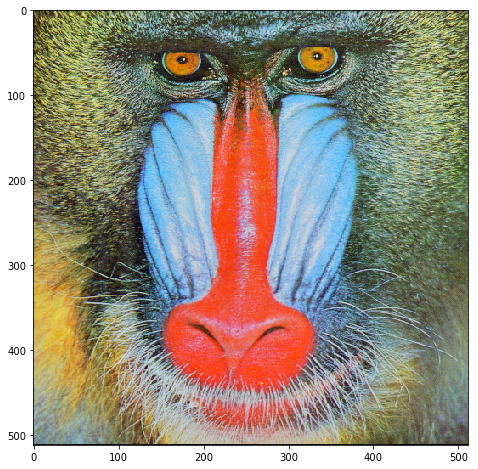

In [2]:
A = imread('data/mandrill-large.tiff')
plt.figure(figsize=(8,8))
plt.imshow(A)
plt.show()  # 若没有这一步，将不会显示


### 问题（b）读取mandrill-small，并显示。使用k-means对其进行聚类。

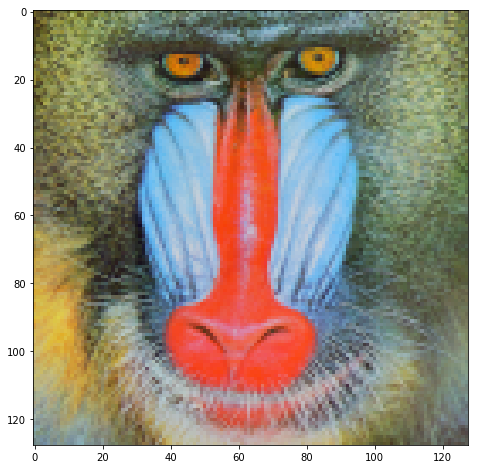

In [3]:
B = imread('data/mandrill-small.tiff')
plt.figure(figsize=(8,8))
plt.imshow(B)
plt.show()

后面将使用Kmeans算法，将B中的像素点分为16类，并使用这16类个聚类中心的像素值替换其相同类别其他样本的像素值。下面进行30轮迭代。
步骤1：随机选取16个样本点初始化mu

In [4]:
def initialization(B,k):
    init_mu = np.zeros((k,3))
    for i in range(k):
        x,y = np.random.randint(low=0,high=B.shape[0]),np.random.randint(low=0,high=B.shape[1])
        init_mu[i,:] = B[x,y,:]
    return init_mu

步骤2：为每个样本点分配聚类中心
步骤3：更新聚类中心为其样本点的均值

In [5]:
def Kmeans(B,iter,k):
    m,n = B.shape[:2]
    mu = initialization(B,k)

    for it in range(iter):
        asignment_num = np.zeros((k, 3))  # 每个聚类中心分配的样本点总和
        nums = np.zeros((k, 1))           # 每个聚类中心分配的样本点个数
        for i in range(m):          # 求每个样本点最近的聚类中心
            for j in range(n):
                dist = [[0] for x in range(k)]
                for c in range(k):   #计算每个样本点到聚类中心的欧式距离
                    d = B[i,j,:] - mu[c,:]
                    dist[c] = d.dot(d.T)
                c_i = np.argmin(dist)
                asignment_num[c_i] += B[i,j,:]
                nums[c_i] += 1
        for i in range(k):           # 求聚类中心的平均值
            if nums[i]>0:
                mu[i,:] = asignment_num[i] / nums[i]
    return mu

将B中的每个样本点替换为与其最近的聚类中心的值，进行压缩

In [6]:
def compression(B,new_B,mu,k):
    m,n = B.shape[:2]
    for i in range(m):
        for j in range(n):
            dist = [[0] for x in range(k)]
            for c in range(k):
                d = B[i,j,:] - mu[c]
                dist[c] = d.dot(d.T)
            c_i = np.argmin(dist)
            new_B[i,j,:] = mu[c_i,:]
    return new_B

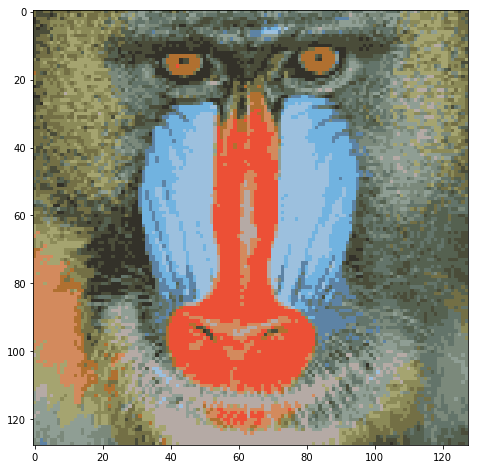

In [8]:
if __name__ == '__main__':
    new_B = B
    k = 16
    iter = 30
    mu = Kmeans(B,iter,k)
    new_B = compression(B,new_B,mu,k)
    plt.figure(figsize=(8,8))
    plt.imshow(new_B)
    plt.show()

### 问题（c）对mandrill-large做同样的处理

In [9]:
#只需要改变主函数部分调用关系即可

### 问题（d）如果我们展示压缩后的16色图像，我们大约压缩的比例为多少

Answer：以前表示一个像素点的颜色的值需要24比特，但现在表示这16种颜色只需要$log_216 = 4$比特，压缩因子约为$24/4=6$，压缩了6倍。